In [3]:
"""Here, we will import all required libraries('NumPy' for mathematical functions for the working on arrays,
'Pandas' for data manipulation and analysis,'Matplotlib' for interactive visualization and 'Seaborn' for high-level data visualization)"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#First, we will import data from given URL and then will store it.
url = "http://bit.ly/w-data"
student_data=pd.read_csv(url)
print("Student Data Imported Succesfully!")

Student Data Imported Succesfully!


In [5]:
#We will print the dataset of students percentage.
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Return the number of rows and columns of the above dataset using the method 'shape()'.
student_data.shape

(25, 2)

In [7]:
#For getting the information about the dataframe, we will use(here) the method 'info()'.
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
"""Describe function is used to get a descriptive statistics summary of a given dataframe which includes mean, count, std deviation, percentiles, 
and min-max values of all the features."""
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


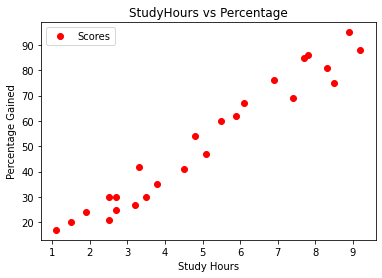

In [11]:
# Plotting of distribution of scores
student_data.plot(x='Hours', y='Scores',style='o', c='r')  
plt.title('StudyHours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Percentage Gained')  
plt.show()

In [14]:
#variable 'x' contains the list of number of hours studied and variable 'y' contains the list of percentage obtained by students. 
x = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values
#Displays the list of number of studyhours. 
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
#Displays the list of scores(%) gained.
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

#x's training data
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [17]:
#x's test data
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [18]:
#y's training data
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [19]:
#y's test data
y_test

array([20, 27, 69, 30, 62])

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training complete.")

Training complete.


In [21]:
#The attribute 'coef_' computes the coefficients of the features in the decision function
regressor.coef_

array([9.91065648])

In [22]:
#The attribute 'intercept_' is to represents the constant(bias), added to the decision function.
regressor.intercept_

2.018160041434662

In [23]:
#Checking the percentage of correct predictions(that is, accuracy) for the test data.
print("Accuracy : ",regressor.score(x_test, y_test)*100)

Accuracy :  94.54906892105353


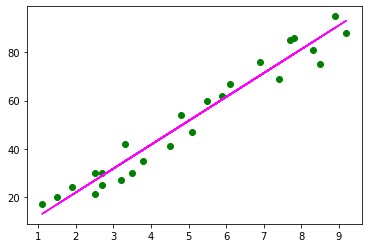

In [24]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y, c='g')
plt.plot(x, line, color='magenta');
plt.show()

In [25]:
#Now, we will predict the scores with the help of the 'trained algorithm'.
#In Python, predict() function enables us to predict the labels of the data values on the basis of the trained model.
y_prediction = regressor.predict(x_test)
y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [26]:
avp = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})  
avp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


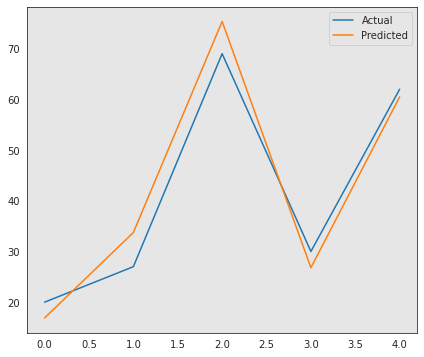

In [27]:
sns.set_style('white', {"axes.facecolor": ".9"})
avp.plot(kind='line',figsize=(7,6))

In [28]:
hours = 9.25
predicted = regressor.coef_*hours+regressor.intercept_
print("No of StudyHours = ",hours)
print("Predicted Percentage(Score) = ",predicted[0])
y_predict=regressor.predict([[hours]])
print("If a student studied for 9.25 hours per day, then the predicted percentage(score):",y_predict[0])

No of StudyHours =  9.25
Predicted Percentage(Score) =  93.69173248737539
If a student studied for 9.25 hours per day, then the predicted percentage(score): 93.69173248737539


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
xyy=mean_absolute_error(y_prediction,y_test)
pss=mean_squared_error(y_prediction,y_test)
score_of_r=r2_score(y_prediction,y_test)
mnn=np.sqrt(pss)
print('Mean Absoulte Error:',xyy)
print('Mean Squared Error:',pss)
print('Root Mean Squared Error:',mnn)
print('R-Squared:',score_of_r)

Mean Absoulte Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-Squared: 0.9546785947197246
